In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('/Users/Екатерина/Downloads/amenia.csv')
df.head()

,Age,Sex,MPV,RDW,RDW_SD,RDW_CV,PDW,EO_REL,EO_ABS,BA_REL,...,WBC,PCT,LY_REL,LY_ABS,NE_REL,NE_ABS,MO_REL,ESR_Westergren,SEGM_NEUT,ICD-10
0,90,0,NaN,12.42,NaN,12.60,NaN,3.66,0.08,0.51,...,9.62,0.31,30.39,1.30,60.83,2.80,7.83,20.17,58.64,Микроцитарно-гипохромная анемия (средняя степень)
1,37,1,9.61,16.97,35.62,NaN,NaN,3.10,0.18,0.41,...,4.66,0.20,35.57,1.52,71.34,4.26,8.11,NaN,47.88,Микроцитарно-гипохромная анемия (тяжёлая степень)
2,71,0,10.01,16.64,NaN,13.53,NaN,3.05,0.31,1.33,...,7.62,NaN,26.95,4.00,59.16,1.91,11.05,20.47,NaN,Микроцитарно-гипохромная анемия (тяжёлая степень)
3,62,1,NaN,11.19,NaN,13.42,NaN,4.09,0.34,0.57,...,6.34,0.27,32.09,2.42,65.48,6.55,3.35,NaN,NaN,Микроцитарно-гипохромная анемия (средняя степень)
4,99,1,8.16,12.68,NaN,13.69,NaN,0.91,0.14,1.86,...,7.99,0.21,43.21,2.50,76.35,3.90,10.11,NaN,NaN,Микроцитарно-гипохромная анемия (средняя степень)


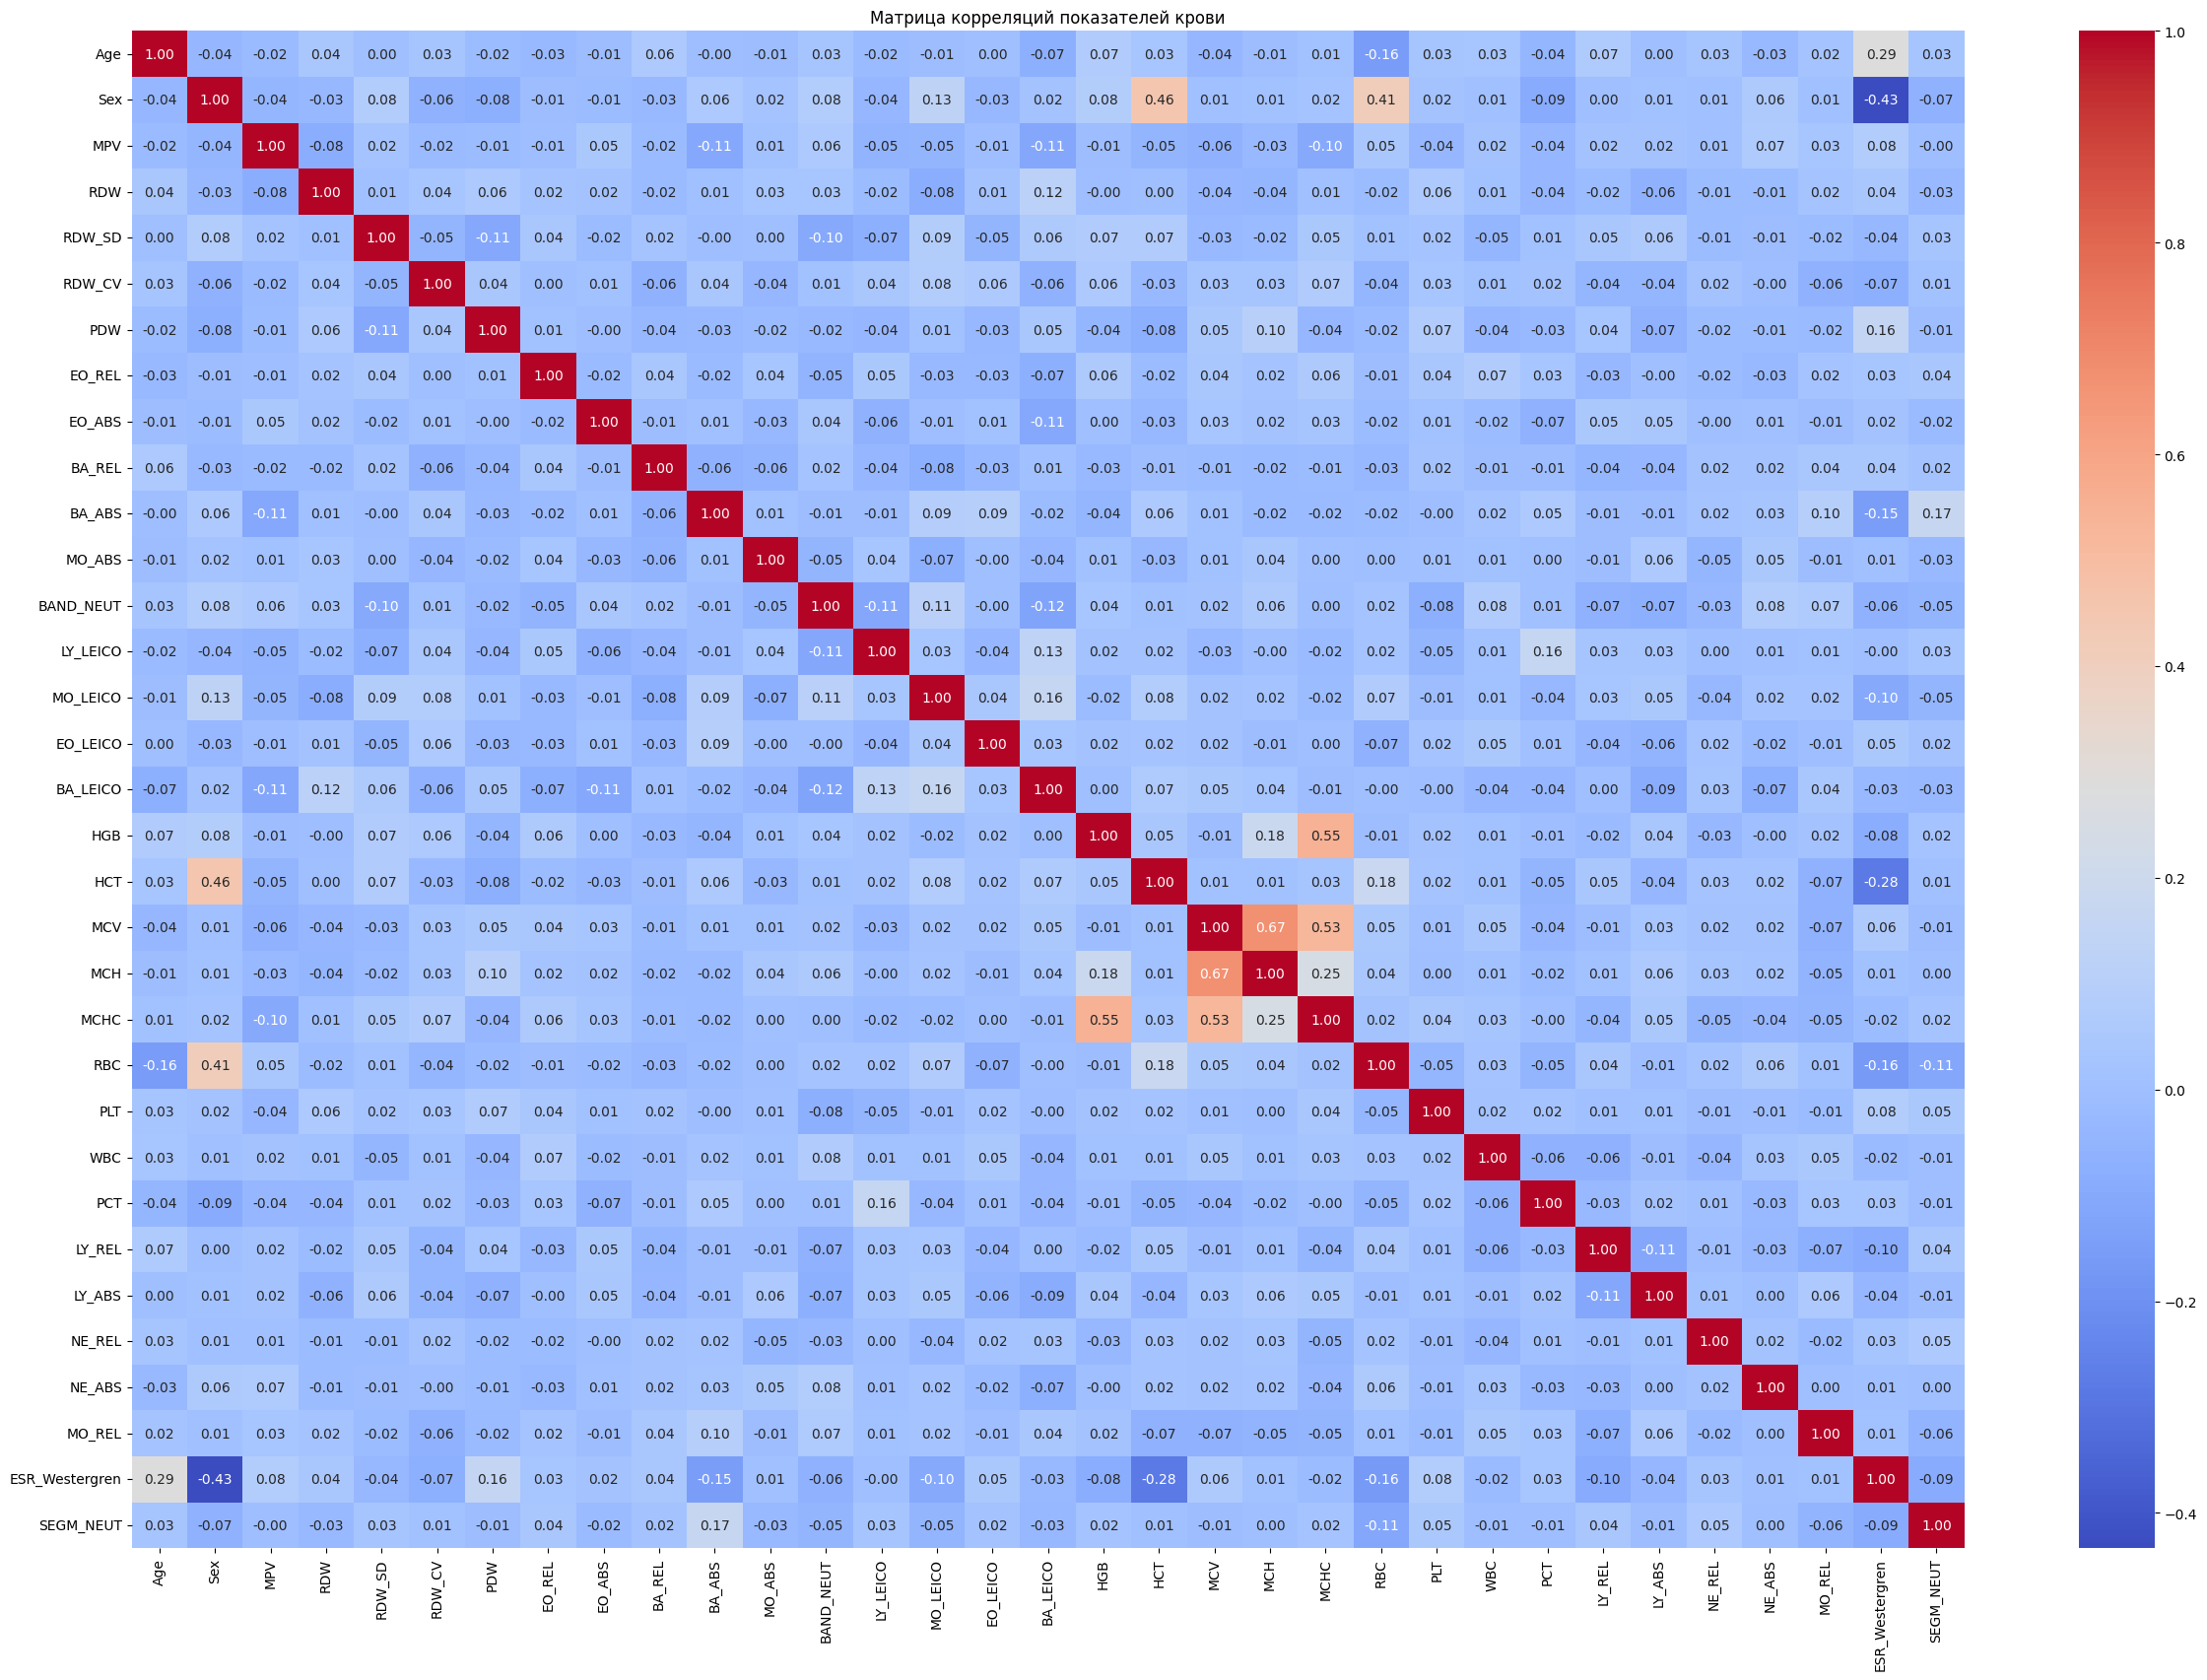

In [12]:
# Рассчитываем матрицу корреляций
correlation_matrix = df.iloc[:,:-1].corr()

# Создаем тепловую карту
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Матрица корреляций показателей крови')
plt.show()

При оценке силы связи коэффициентов корреляции используется шкала Чеддока:

 - От 0 до 0,3 — очень слабая корреляция
 - От 0,3 до 0,5 — слабая корреляция
 - От 0,5 до 0,7 — средняя корреляция
 - От 0,7 до 0,9 — сильная (высокая) корреляция
 - От 0,9 до 1,0 — очень сильная (очень высокая) корреляция

Вывод: у нас все признаки имеют слабую - очень слабую корреляцию и только несколько (MCH, MCHC, MCV) имеют среднюю корреляцию. 

#### Feature Importance (Важность признаков)

In [21]:
# Разделение данных на признаки и целевую переменную
X = df.iloc[:,:-1]
y = df['ICD-10']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Создание модели Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Получение важности признаков
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Вывод важности признаков
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]}")

HGB: 0.25031478843184907
MCV: 0.1991781731311838
MCHC: 0.15970201231000253
MCH: 0.12477920904255434
MPV: 0.012548706849353724
MO_LEICO: 0.011657795810661844
NE_ABS: 0.011469419040795778
LY_LEICO: 0.011371582498067159
WBC: 0.011098789517560215
MO_REL: 0.010827032382291855
RDW: 0.010791439561992666
NE_REL: 0.010777284245235746
PCT: 0.010594487960411814
EO_REL: 0.01059044407613575
EO_LEICO: 0.010472662283770945
RBC: 0.01040109950269315
PLT: 0.010399876492182665
BA_REL: 0.010393226129085236
LY_REL: 0.010225444792965548
HCT: 0.010212511817642324
PDW: 0.009610270567797686
LY_ABS: 0.009481307392471642
MO_ABS: 0.008700040115200876
Age: 0.008485807509400986
RDW_CV: 0.008358865965130169
BAND_NEUT: 0.008285122045546212
RDW_SD: 0.008008859855017226
EO_ABS: 0.007368486121686104
BA_LEICO: 0.006705670219326521
SEGM_NEUT: 0.006674511922868102
ESR_Westergren: 0.004771744013383507
BA_ABS: 0.004196454894247821
Sex: 0.0015468735014870989


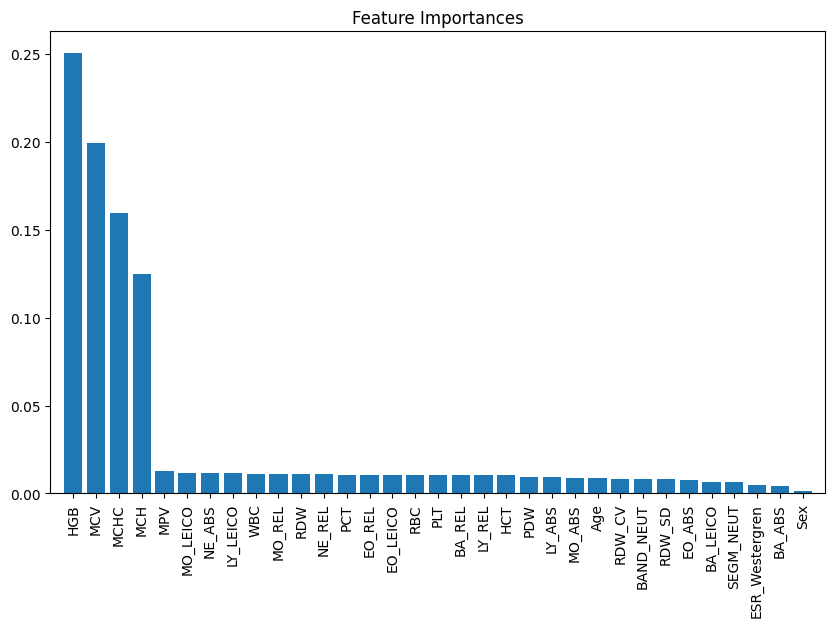

In [23]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Использование перекрестной проверки для подбора порога отсечения важности признаков
# Создание модели Random Forest с отбором признаков
selector = SelectFromModel(model, threshold=0.001)
# Норм пороги: 0.005, 0.0025, 0.001
X_selected = selector.transform(X_train)

# Оценка модели с выбранными признаками
scores = cross_val_score(model, X_selected, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

c:\Users\Екатерина\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Cross-validation scores: [0.9875 0.9625 0.9875 0.9875 0.9625]
Mean cross-validation score: 0.9775


#### SelectKBest

Предварительно надо убрать пропуски в данных

In [ ]:
# Выбор лучших признаков
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)

# Вывод лучших признаков
selected_features = X.columns[selector.get_support()]
print(selected_features)